Question 1. Train a shallow neural network containing a single hidden layer of 100 neurons on the Fashion-MNIST training data by using the following options:

1. logistic loss  
2. stochastic gradient descent (with mini-batch size of your own choice)  
3. the best learning rate (out of at least 5 different values)  
and use it to classify the test data. What kind of accuracy did you achieve, and how long did it take to train the network (with the best learning rate you found)?

Question 2. Repeat Question 1 with the logistic loss + regularization (L1 or L2). You can use the best learning rate from Question 1 but need to tune the regularization parameter (by trying and comparing at least 5 different values). What is your best test accuracy?


#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
import tensorflow as tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [3]:
train_images = train_images/255
test_images = test_images/255

"""
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_all = np.vstack((X_train,X_test))
labels = np.hstack((train_labels,test_labels))
"""

'\nX_train = np.zeros([60000,784]) \nfor i in range(60000): \n    img=train_images[i,:,:]\n    X_train[i,:] = img.reshape([784])\n\nX_test = np.zeros([10000,784]) \nfor i in range(10000):\n    img=test_images[i,:,:]\n    X_test[i,:] = img.reshape([784])\n\nX_all = np.vstack((X_train,X_test))\nlabels = np.hstack((train_labels,test_labels))\n'

#2

In [ ]:
L1_list = [.001,.005,.01,.05,.1]
accs=[]
LR=.09
for L1 in L1_list:
    model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(100, activation ='sigmoid',
                    kernel_regularizer=tf.keras.regularizers.l1(L1)),
                tf.keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])

    model.fit(train_images, train_labels,batch_size=50,epochs=15)
    probs = model.predict(test_images)
    preds=np.argmax(probs,axis=1)

    #print(LR)
    print(accuracy_score(y_true = test_labels,y_pred=preds))
    accs.append(accuracy_score(y_true = test_labels,y_pred=preds))

print(L1_list)
print(accs)

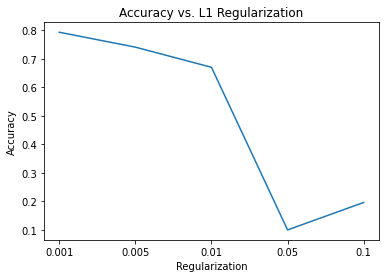

In [22]:
#L1 results
L1_list = [0.001, 0.005, 0.01, 0.05, 0.1]
accuracy_list = [0.7937, 0.7414, 0.6707, 0.1, 0.1963]

plt.plot(range(5),accuracy_list)
plt.xticks(range(5),labels=L1_list)
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. L1 Regularization');

In [ ]:
L2_list = [.001,.005,.01,.05,.1]
accs=[]
LR=.09
for L2 in L2_list:
    model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(100, activation ='sigmoid',
                    kernel_regularizer=tf.keras.regularizers.l2(L2)),
                tf.keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])

    model.fit(train_images, train_labels,batch_size=50,epochs=15)
    probs = model.predict(test_images)
    preds=np.argmax(probs,axis=1)

    #print(LR)
    print(accuracy_score(y_true = test_labels,y_pred=preds))
    accs.append(accuracy_score(y_true = test_labels,y_pred=preds))

print(L1_list)
print(accs)

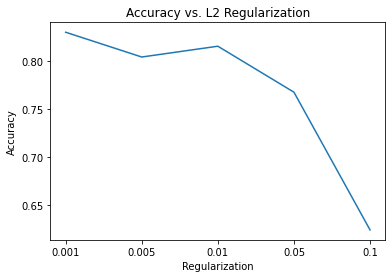

In [23]:
L2_list = [0.001, 0.005, 0.01, 0.05, 0.1]
acc_list = [0.8295, 0.8038, 0.815, 0.7673, 0.6244]

plt.plot(range(5),acc_list)
plt.xticks(range(5),labels=L2_list)
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. L2 Regularization');

In [ ]:
L1_list = [.001,.005,.01,.05,.1]

L2_list = [.001,.005,.01,.05,.1]
accs=np.zeros([5,5])
LR=.01
for a,L1 in enumerate(L1_list):
    for b,L2 in enumerate(L2_list):
        model = tf.keras.Sequential([
                    tf.keras.layers.Flatten(input_shape=(28,28)),
                    tf.keras.layers.Dense(100, activation ='sigmoid',
                        kernel_regularizer=tf.keras.regularizers.l1_l2(L1,L2)),
                    tf.keras.layers.Dense(10,activation='softmax')
        ])

        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                    loss='SparseCategoricalCrossentropy',
                    metrics=['accuracy'])

        model.fit(train_images, train_labels,batch_size=50,epochs=15)
        probs = model.predict(test_images)
        preds=np.argmax(probs,axis=1)

        accs[a,b] = accuracy_score(y_true = test_labels,y_pred=preds)
        
print(accs)
#rows are L1, columns are L2


[[0.7726 0.7653 0.765  0.739  0.7232]
 [0.7229 0.6956 0.7004 0.6464 0.6232]
 [0.6029 0.5948 0.5603 0.3346 0.4432]
 [0.1    0.1116 0.143  0.1558 0.1   ]
 [0.1502 0.1715 0.1    0.1011 0.1   ]]

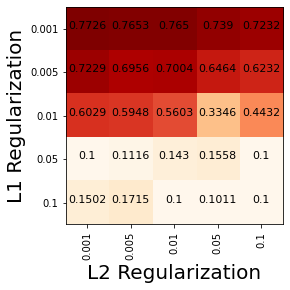

In [19]:
fig,ax = plt.subplots()
ax.imshow(accs,cmap='OrRd')
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_xticklabels([.001,.005,.01,.05,.1],rotation = 90)
ax.set_yticklabels([.001,.005,.01,.05,.1])
ax.set_ylim(len(accs)-.5,-.5)
ax.set_xlabel('L2 Regularization',size=20)
ax.set_ylabel('L1 Regularization',size=20)


for i in range(5):
    for j in range(5):
        test = ax.text(j,i,accs[i,j], ha='center', color='k',size=11)